# pickle - persist arbitrary collections of in memory Python data structures to a file
- pickle uses 'binary' streams
- very handy for "small to medium" data structures
- probably not the best approach for huge data structures
- [doc](https://docs.python.org/3/library/pickle.html) 

In [1]:
import pickle

class SVGBase:
    "this class is not intended to be instantiated"
    # so i don't have to redefine these on every class
    def __str__(self):
        return self.svg()
    def __repr__(self):
        return self.__str__()

# each class should have a 'draw' method
# that knows how to render a graphical object


In [2]:
class circle(SVGBase):
    def __init__(self, cx, cy, r):
        self.cx = cx
        self.cy = cy
        self.r = r
        
    def svg(self):
       return '''
       <circle  cx="{}" cy="{}" r="{}"
        style="fill:Wheat; stroke:SteelBlue; stroke-width:5;"/>'''. \
        format(self.cx, self.cy, self.r)

class rect(SVGBase):
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        
    def svg(self):
       return '''
    <rect x="{}" y="{}" width="{}" height="{}"
        style="stroke:Navy; stroke-width:4; fill:LightSkyBlue;"/>
        '''.format(self.x, self.y, self.width, self.height)

class line(SVGBase):
    def __init__(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
    
    def svg(self):
        return '''
    <line x1="{}" y1="{}" x2="{}" y2="{}"
        style="stroke:SlateBlue; stroke-width:4"/>
    '''.format(self.x1, self.y1, self.x2, self.y2)

In [3]:
class diagram:
    def __init__(self, objs):
        self.objs = objs
    def svg(self):
        s = '''<svg width="400" height="400">'''
        for obj in self.objs:
            s += obj.svg()
        s += '</svg>'
        return s
    def _repr_svg_(self):
        "tell notebook to render SVG"
        return self.svg()
    def dump(self, path):
        # save the Editor and everything it reaches
        # 'bw' - 'binary write'
        with open(path, 'bw') as fd:
            pickle.dump(self, fd)
    def load(path):
        "class method"
        # 'br' - binary read
        with open(path, 'br') as f:
            return pickle.load(f)

In [4]:
c=circle(200, 200,44)
c2 = circle(130,120, 60)
r = rect(250, 100, 40,80)
l = line(0,0, 400,400)

objs = [c,c2, r, l]
d = diagram(objs)
d.svg()

'<svg width="400" height="400">\n       <circle  cx="200" cy="200" r="44"\n        style="fill:Wheat; stroke:SteelBlue; stroke-width:5;"/>\n       <circle  cx="130" cy="120" r="60"\n        style="fill:Wheat; stroke:SteelBlue; stroke-width:5;"/>\n    <rect x="250" y="100" width="40" height="80"\n        style="stroke:Navy; stroke-width:4; fill:LightSkyBlue;"/>\n        \n    <line x1="0" y1="0" x2="400" y2="400"\n        style="stroke:SlateBlue; stroke-width:4"/>\n    </svg>'

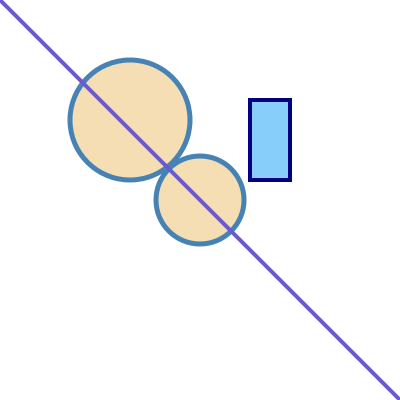

In [5]:
d

In [6]:
import tempfile

# does not create the file, just makes a pathname
path = tempfile.NamedTemporaryFile().name

d.dump(path)

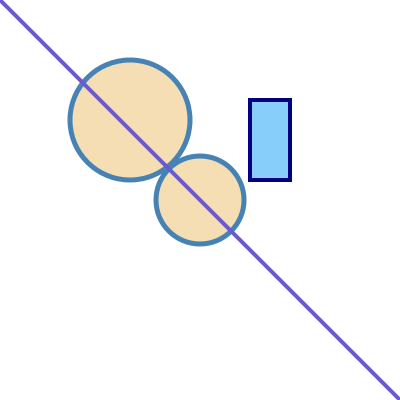

In [7]:
# read dumped file, and 
# reconstruct the saved data structures

# if your pickle dump includes custom classes 
# or functions, they must be defined 
# before you do a pickle load.
# 'br' - binary read

dd = diagram.load(path)
dd